# Logistic Regression with Diabetes Dataset
John Bonfardeci
2020-01-24

## Import External Libraries

In [212]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

# Additional libs
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import os
import statsmodels.api as sm
from sklearn.model_selection import StratifiedKFold
from scipy.stats import boxcox
from scipy.special import boxcox1p # handles zeroes
from sklearn.metrics import auc, confusion_matrix
from sklearn.linear_model import Lasso, LassoCV
from sklearn.feature_selection import RFE, SelectFromModel, SelectFpr
from sklearn import preprocessing # variance scaling

# John B's Stat Custom Utilities
from StatUtilities import Utilities as u

import math

## Contansts & Global Vars

In [154]:
FILE_PATH = 'diabetes.csv'
TARGET = 'Diabetic'
COLUMN_NAMES = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure', \
                 'TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']

OUTPUT_DIR = ''
df_raw = None # Pandas DataFrame for raw imported data.
df = None # Pandas DataFrame to store our model data.
df_coef = None # DataFrame to store predictor coefficients and p-values

# SAMPLE

In [155]:
def split_data(df, columns, target):  
    # Separate features and labels
    X, y = df[columns].values, df[target].values
    # Split data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
    return X_train, X_test, y_train, y_test
    

## Load the Dataset
Features error checking for file exists.

In [191]:
# Import data and display a summary table.
def import_data(file_path):
    """
    Import a CSV file to a Pandas dataframe.
    @param file_path <string>
    @return Pandas Dataframe
    """
    try:
        if not os.path.exists(file_path):
            print('Invalid file path!')
            return None

        df = pd.read_csv(file_path) # returns new Pandas DataFrame 
        return df
    except IOError:
        print('Error reading file ' + file_path)
        return None

if __name__ == '__main__':
    df_raw = import_data(FILE_PATH)
    # Drop the ID column
    df_raw = df_raw.drop('PatientID', 1).dropna()
    display(df_raw.describe())

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100,0.334400
std,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047,0.471804
min,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000,0.000000
25%,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000,0.000000
50%,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000,0.000000
75%,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000,1.000000
max,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000,1.000000


# EXPLORE

## Univariate Analysis

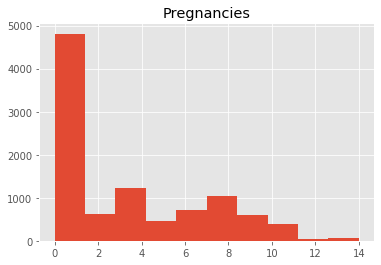

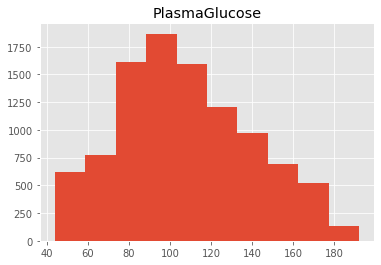

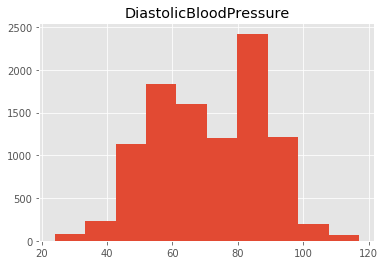

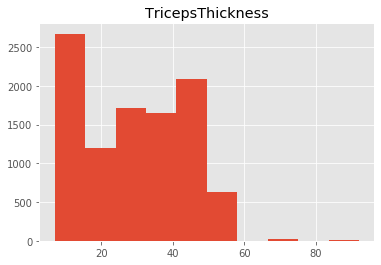

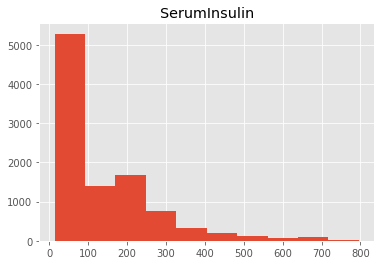

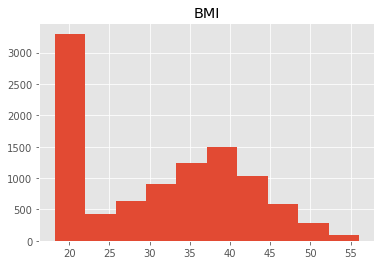

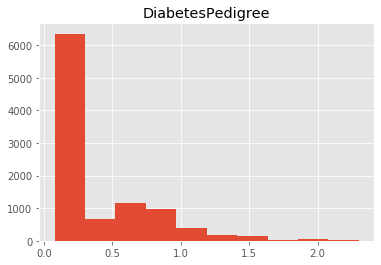

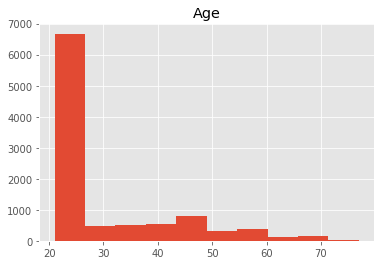

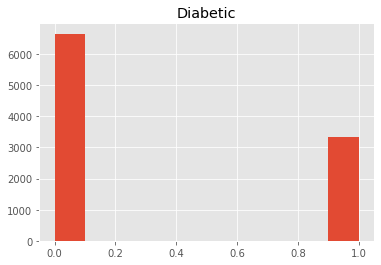

In [192]:
def get_hist(df):
    """
    Create histograms for each variable in a Pandas DataFrame.
    """
    tmp = pd.DataFrame()
    if type(df) != type(tmp):
        print("Parameter 'df' must be of type DataFrame.")
        return

    for col in df.columns:
        ax = df[col].hist()
        ax.set_title(col)
        plt.show()

if __name__ == '__main__':
    get_hist(df_raw)

## Multivariate Analysis

Populating the interactive namespace from numpy and matplotlib


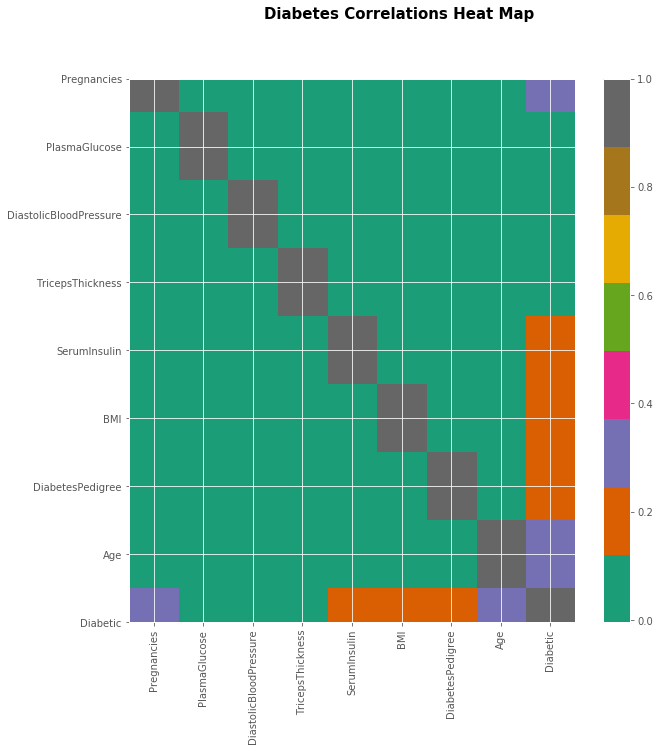

In [193]:
def get_corrs(df):
    #Compute Percentage Change
    rets = df.pct_change()

    #Compute Correlation
    corr = rets.corr()

    #Plot Correlation Matrix using Matplotlib
    %pylab inline
    plt.figure(figsize=(10, 10))
    plt.imshow(corr, cmap='Dark2', interpolation='none', aspect='auto') 
    plt.colorbar()
    plt.xticks(range(len(corr)), corr.columns, rotation='vertical')
    plt.yticks(range(len(corr)), corr.columns);
    plt.suptitle('Diabetes Correlations Heat Map', fontsize=15, fontweight='bold')
    plt.show()
    
if __name__ == '__main__':
    get_corrs(df_raw)

<strong>Colormap values:</strong> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r

## Get Estmimates Coefficients and P-values

In [194]:
def get_var_estimates(target_name, y, X, columns):
    """
    Show OLS parameter estimates for the model.
    Ref: http://statsmodels.sourceforge.net/devel/generated/statsmodels.regression.linear_model.RegressionResults.html
    http://statsmodels.sourceforge.net/devel/examples/generated/example_ols.html
    @param target_name <string>
    @param y <list>
    @param X <Pandas Dataframe>
    @param columns <list>
    @returns Statsmodel summary
    """
    model = sm.OLS(y, X)
    results = model.fit()
    summary = results.summary(yname=target_name, xname=columns, title='PValues', alpha=0.05)
    
    # Build dataframe to store coeffients and p-values.
    predictors = []
    for row in summary.tables[1].data:
        try:
            pvalue = float(row[4])
            if pvalue <= 0.05:
                col = row[0]
                coef = float(row[1])
                #if pvalue <= 0.05:
                predictors.append([col, coef, pvalue])
        except:
            continue
        
    df_coef = pd.DataFrame(data=predictors, columns=['Predictor', 'Coef', 'Pvalue'])
    df_coef = df_coef.sort_values('Coef', ascending=False)  
    display(df_coef)
      
    return summary, df_coef
    
if __name__ == '__main__':
    X_train, X_test, y_train, y_test = split_data(df_raw, COLUMN_NAMES, TARGET)
    summary, df_coef = get_var_estimates(target_name=TARGET, y=y_train, X=X_train, columns=COLUMN_NAMES)
    display(summary)
    

,Predictor,Coef,Pvalue
6,DiabetesPedigree,0.1193,0.000
0,Pregnancies,0.0450,0.000
7,Age,0.0084,0.000
5,BMI,0.0018,0.000
3,TricepsThickness,0.0012,0.000
4,SerumInsulin,0.0005,0.000
1,PlasmaGlucose,-0.0004,0.003
2,DiastolicBloodPressure,-0.0030,0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        PValues                                        
=======================================================================================
Dep. Variable:               Diabetic   R-squared (uncentered):                   0.528
Model:                            OLS   Adj. R-squared (uncentered):              0.527
Method:                 Least Squares   F-statistic:                              976.0
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                        0.00
Time:                        12:55:33   Log-Likelihood:                         -3463.8
No. Observations:                7000   AIC:                                      6944.
Df Residuals:                    6992   BIC:                                      6999.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Pregnancies                0.0450      0.001     31.311      0.000       0.042       0.048
PlasmaGlucose             -0.0004      0.000     -2.967      0.003      -0.001      -0.000
DiastolicBloodPressure    -0.0030      0.000    -13.273      0.000      -0.003      -0.003
TricepsThickness           0.0012      0.000      3.892      0.000       0.001       0.002
SerumInsulin               0.0005   3.58e-05     14.204      0.000       0.000       0.001
BMI                        0.0018      0.000      4.090      0.000       0.001       0.003
DiabetesPedigree           0.1193      0.013      9.511      0.000       0.095       0.144
Age                        0.0084      0.000     21.799      0.000       0.008       0.009
==============================================================================
Omnibus:                      638.711   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              390.310
Skew:                           0.449   Prob(JB):                     1.76e-85
Kurtosis:                       2.270   Cond. No.                         592.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

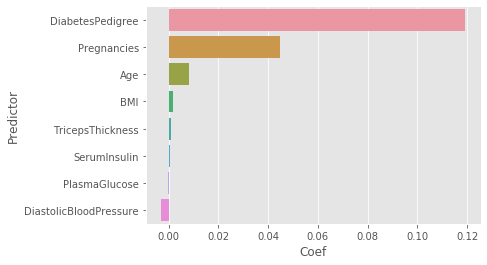

In [195]:
ax = sns.barplot(y="Predictor", x="Coef", data=df_coef)

# MODIFY

## LASSO feature selection

In [196]:
if __name__ == '__main__':
    X_train, X_test, y_train, y_test = split_data(df_raw, COLUMN_NAMES, TARGET)
    significant_features = u.get_lasso_selection(X_train, y_train, COLUMN_NAMES)
    print('Selected significant variables are:\r\n', ', '.join(significant_features))

    df = u.remove_insignificant_vars(significant_features, df_raw.copy())
    display(df.describe())
    X = df.as_matrix() 
    columns = df.columns.tolist()
    #get_hist(df)

Selected significant variables are:
 Pregnancies, PlasmaGlucose, DiastolicBloodPressure, TricepsThickness, SerumInsulin, BMI, DiabetesPedigree, Age

Dropped insignificant vars:  Diabetic


,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.25580,107.850200,71.207500,28.81760,139.243600,31.567022,0.400944,30.134100
std,3.40572,31.920909,16.801478,14.50648,133.777919,9.804366,0.381463,12.106047
min,0.00000,44.000000,24.000000,7.00000,14.000000,18.200807,0.078044,21.000000
25%,0.00000,84.000000,58.000000,15.00000,39.000000,21.247427,0.137065,22.000000
50%,2.00000,105.000000,72.000000,31.00000,85.000000,31.922421,0.199698,24.000000
75%,6.00000,129.000000,85.000000,41.00000,197.000000,39.328921,0.621158,35.000000
max,14.00000,192.000000,117.000000,92.00000,796.000000,56.034628,2.301594,77.000000


C:\Users\bonfardeci-j\.conda\envs\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


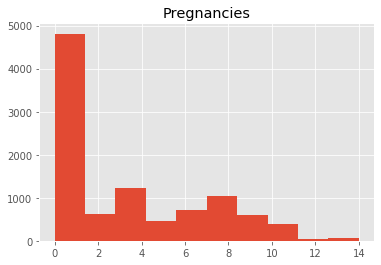

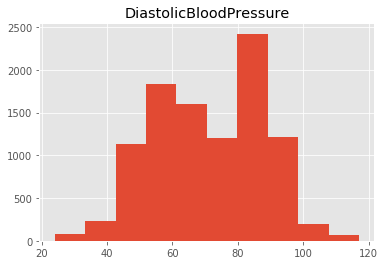

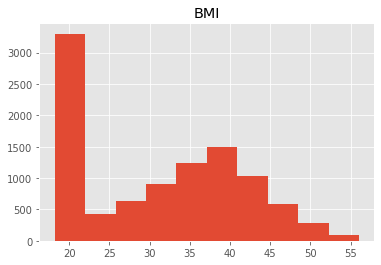

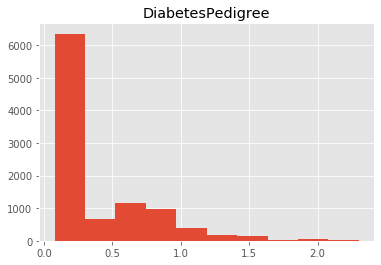

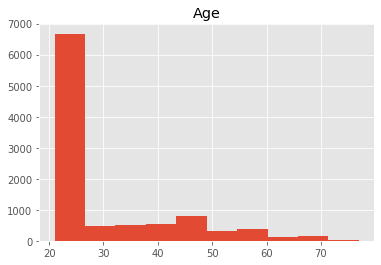

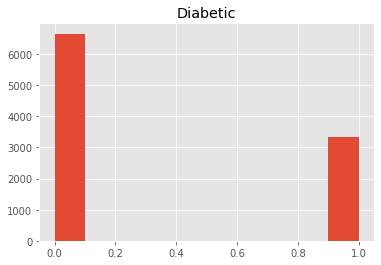

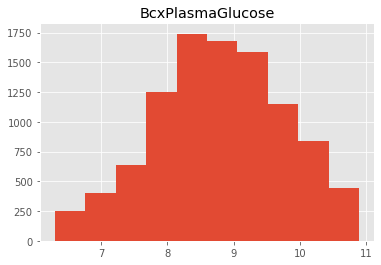

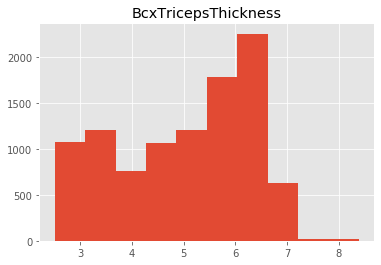

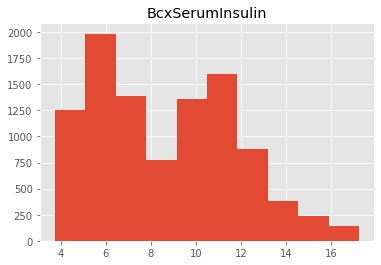

In [203]:
tx = df_raw.copy()
lmbda = 0.25
#tx['BcxPregnancies'] = boxcox(tx['Pregnancies'], lmbda)
tx['BcxPlasmaGlucose'] = boxcox(tx['PlasmaGlucose'], lmbda)
tx['BcxTricepsThickness'] = boxcox(tx['TricepsThickness'], lmbda)
tx['BcxSerumInsulin'] = boxcox(tx['SerumInsulin'], lmbda)
#tx['BcxBMI'] = boxcox(tx['BMI'], lmbda)
#tx['BcxDiabetesPedigree'] = boxcox(tx['DiabetesPedigree'], lmbda)
#tx['BcxAge'] = boxcox(tx['Age'], lmbda)

tx = tx.drop('PlasmaGlucose', 1).drop('TricepsThickness', 1).drop('SerumInsulin', 1)
get_hist(tx)

In [204]:
tx.describe()

,Pregnancies,DiastolicBloodPressure,BMI,DiabetesPedigree,Age,Diabetic,BcxPlasmaGlucose,BcxTricepsThickness,BcxSerumInsulin
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.25580,71.207500,31.567022,0.400944,30.134100,0.334400,8.781294,5.001549,8.651854
std,3.40572,16.801478,9.804366,0.381463,12.106047,0.471804,0.973048,1.314616,3.108370
min,0.00000,24.000000,18.200807,0.078044,21.000000,0.000000,6.302038,2.506306,3.737346
25%,0.00000,58.000000,21.247427,0.137065,22.000000,0.000000,8.109600,3.871959,5.995998
50%,2.00000,72.000000,31.922421,0.199698,24.000000,0.000000,8.804343,5.438444,8.145481
75%,6.00000,85.000000,39.328921,0.621158,35.000000,1.000000,9.480544,6.121758,10.985683
max,14.00000,117.000000,56.034628,2.301594,77.000000,1.000000,10.889678,8.388164,17.246542


,Predictor,Coef,Pvalue
3,TricepsThickness,0.1723,0.000
0,Pregnancies,0.1096,0.000
7,Age,0.0662,0.000
4,SerumInsulin,0.0538,0.000
2,DiastolicBloodPressure,0.0204,0.000
6,DiabetesPedigree,0.0195,0.015
1,PlasmaGlucose,-0.0147,0.000
5,BMI,-0.1642,0.000


<class 'statsmodels.iolib.summary.Summary'>
"""
                                        PValues                                        
=======================================================================================
Dep. Variable:               Diabetic   R-squared (uncentered):                   0.551
Model:                            OLS   Adj. R-squared (uncentered):              0.550
Method:                 Least Squares   F-statistic:                              1071.
Date:                Fri, 24 Jan 2020   Prob (F-statistic):                        0.00
Time:                        13:00:52   Log-Likelihood:                         -3289.3
No. Observations:                7000   AIC:                                      6595.
Df Residuals:                    6992   BIC:                                      6649.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Pregnancies                0.1096      0.003     37.332      0.000       0.104       0.115
PlasmaGlucose             -0.0147      0.002     -6.957      0.000      -0.019      -0.011
DiastolicBloodPressure     0.0204      0.003      7.842      0.000       0.015       0.026
TricepsThickness           0.1723      0.016     10.949      0.000       0.141       0.203
SerumInsulin               0.0538      0.002     22.706      0.000       0.049       0.058
BMI                       -0.1642      0.010    -16.831      0.000      -0.183      -0.145
DiabetesPedigree           0.0195      0.008      2.423      0.015       0.004       0.035
Age                        0.0662      0.005     14.320      0.000       0.057       0.075
==============================================================================
Omnibus:                      356.439   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              214.690
Skew:                           0.292   Prob(JB):                     2.40e-47
Kurtosis:                       2.371   Cond. No.                         71.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

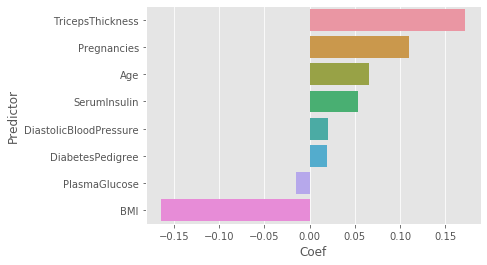

In [208]:
columns = tx.columns.to_list()
columns.remove(TARGET)
X_train, X_test, y_train, y_test = split_data(tx, columns, TARGET)
summary, df_coef = get_var_estimates(target_name=TARGET, y=y_train, X=X_train_bcx, columns=COLUMN_NAMES)
display(summary)
ax = sns.barplot(y="Predictor", x="Coef", data=df_coef)

# MODEL with ASSESSMENT

In [209]:
# Set regularization hyperparameter
reg = 0.05

model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

# calculate accuracy
y_hat = model.predict(X_test)
acc = np.average(y_hat == y_test)
print('Accuracy:', acc)

# calculate AUC
y_scores = model.predict_proba(X_test)
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

Accuracy: 0.7803333333333333
AUC: 0.855851534902234


## Use Cross Validation and Best Cutoff to Improve Fit
Produces ROC and confusion matrix to assess accuracy of model on the validation set.

Fold 1, TPR: 0.80043, TNR: 0.76981, Cutoff: 0.32000
Fold 2, TPR: 0.77088, TNR: 0.81672, Cutoff: 0.35000
Fold 3, TPR: 0.89293, TNR: 0.70204, Cutoff: 0.23000
Fold 4, TPR: 0.83512, TNR: 0.74491, Cutoff: 0.27000
Fold 5, TPR: 0.82227, TNR: 0.75241, Cutoff: 0.30000
Means: TPR: 0.82434, TNR: 0.75718, Cutoff: 0.29400, Accuracy: 0.79076
ROC image was saved to: logit-roc.png


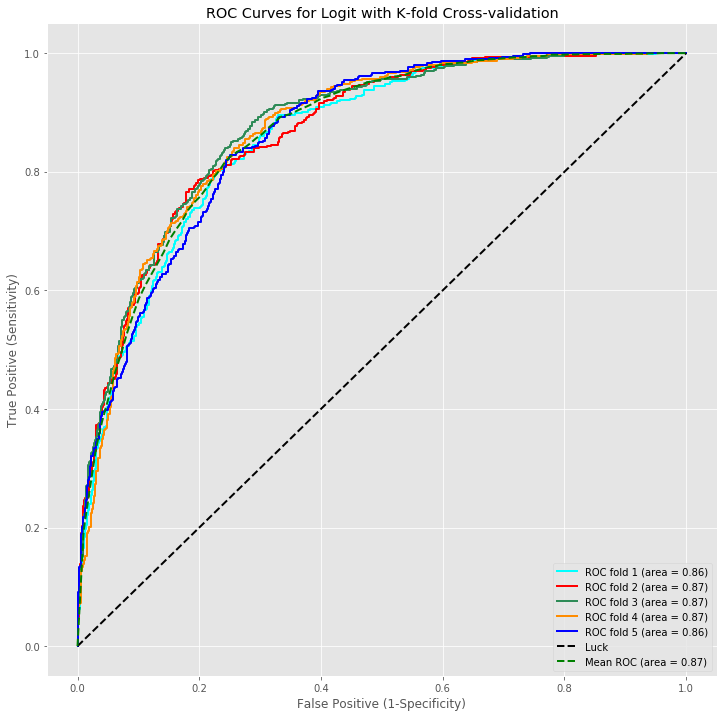

Excel file was saved to: logit-cms.csv
Confusion matrix image was saved to: logit-best-tp-cm.png


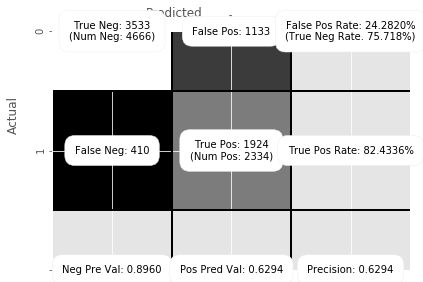

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic,Prob_0,Prob_1,Predicted
6995,1.375524,-0.937157,-1.143073,0.207199,-0.617328,1.455004,-0.060883,0.776533,0,0.477078,0.522922,1
6996,-0.371966,-0.151335,0.918267,-0.753697,-0.617328,0.145572,0.964378,-0.187480,1,0.815534,0.184466,0
6997,-0.663214,-0.211783,-1.076306,0.078565,-0.783276,-0.485122,0.531821,-1.532164,0,0.976113,0.023887,0
6998,-0.663214,-0.574470,-0.987869,1.228368,1.291078,-1.446575,1.334859,-0.556069,1,0.755614,0.244386,0
6999,-0.080717,-1.964771,0.449244,3.932377,1.457027,1.593154,-0.508723,-0.861046,0,0.213047,0.786953,1


In [217]:
# Run logistic Regression with cross-validation and plot ROC curves
# Logit can use categorical variaables. Append to cols and get new data set
def fit_logit(X, y, num_cv=5, to_csv=False):
    """
    Fit a model with Logistic Regression.
    """
    #rand = np.random.RandomState(0)
    cv = StratifiedKFold(n_splits=num_cv) # split into N folds /shuffle=True, random_state=rand
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100) # `linspace` returns evenly spaced numbers over a specified interval.
    roc_kfolds = [] # store TPR and FPR for each iteration and plot to ROC curve
    cm_folds = []
    logit_actual = []
    logit_prob = []
    best_mean_cutoff = 0.0
    best_mean_tpr = 0.0
    best_mean_fpr = 0.0
    predicted_data = []
    tn=[]; fp=[]; fn=[]; tp=[];
    
    # For each cross-validation batch, fit model 80:20 split, plot ROC, and get cutoff
    # train, test are of type <type 'numpy.ndarray'>
    i = 0
    for (train, test) in cv.split(X, y):

        test_actual = y[test]
        test_X = preprocessing.scale(X[test])
        train_X = preprocessing.scale(X[train])
        train_y = y[train]

        # train Logit on training dataset
        logit = LogisticRegression()
        logit.fit(train_X, train_y)

        # test Logit on test dataset
        # predict probability returns <type 'numpy.ndarray'> (n_samples, n_classes)
        prob = logit.predict_proba(test_X)

        # get predicted values: 1/0; default threshold/cutoff is 0.5
        predicted = logit.predict(test_X)
        train_predicted = logit.predict(train_X)

        # Compute ROC curve
        # fpr = false positive rate (1-specificity)
        # tpr = true positive rate (sensitivity)
        fpr, tpr, thresholds = roc_curve(test_actual, prob[:, 1]) # returns <type 'numpy.ndarray'> x 3
        
        # add mean Sensitivity
        mean_tpr += interp(mean_fpr, fpr, tpr)
        mean_tpr[0] = 0.0

        logit_actual.extend(test_actual)
        logit_prob.extend(prob)
        best_tpr, best_fpr, best_cutoff, _tn, _fp, _fn, _tp = u.get_best_cutoff(actual=test_actual, prob=prob)
        roc_kfolds.append([tpr, fpr])
        best_mean_cutoff += best_cutoff
        tn.append(_tn)
        fp.append(_fp)
        fn.append(_fn)
        tp.append(_tp)
        
        print('Fold %d, TPR: %0.5f, TNR: %0.5f, Cutoff: %0.5f' % (i+1, best_tpr, 1-best_fpr, best_cutoff))
    
        # Collect test set into combined table
        predicted_data.extend(u.combine(prob, test_X, test_actual, predicted))
        
        i += 1
    #/for (train, test)...

    best_mean_cutoff /= float(num_cv)
    tneg = sum(tn)
    fpos = sum(fp)
    fneg = sum(fn)
    tpos = sum(tp)
    best_mean_tpr = tpos / (tpos+fneg)
    best_mean_tnr = tneg / (tneg+fpos)
    accuracy = (best_mean_tpr + best_mean_tnr) / 2
    print('Means: TPR: %0.5f, TNR: %0.5f, Cutoff: %0.5f, Accuracy: %0.5f'%(best_mean_tpr, best_mean_tnr, best_mean_cutoff, accuracy))

    # Display ROC Curve, output to CSV
    u.show_roc(roc_kfolds, mean_tpr, mean_fpr, 'ROC Curves for Logit with K-fold Cross-validation', 2, OUTPUT_DIR+'logit-roc')

    if to_csv:
        u.output_cms(OUTPUT_DIR+'logit-cms', cm_folds, OUTPUT_DIR+'Logit_Test_Folds') # output to excel

    # Display Confustion Matrix, output to PNG
    cm = np.asarray( [[tneg,fpos],[fneg,tpos]] )
    u.show_confusion_matrix(cm, ['0','1'], (6,6), 12, OUTPUT_DIR+'logit-best-tp-cm')
    
    # Output final dataset with predictions to CSV  
    col_names = np.append(np.asarray(significant_features), np.asarray([TARGET, 'Prob_0', 'Prob_1', 'Predicted']))
    df = pd.DataFrame(data=predicted_data, columns=col_names)
    if to_csv:
        df.to_csv(OUTPUT_DIR + 'logit-validation.csv')
        
    display(df.tail())
    
if __name__ == '__main__':
    fit_logit(X=X_train, y=y_train, num_cv=5, to_csv=True)